# Tests de MDP_parser

Déclarations des fichiers

In [5]:
file_mas = "exemples/machine_a_sous.mdp"
file_dice = "exemples/dice.mdp"
file_ex2 = "exemples/ex2.mdp"

Affichage en ligne des commande des graphes

In [ ]:
%run main.py print {file_mas}

States: [('S0', 0), ('S1', 100), ('S2', 5), ('S3', 500), ('S4', 3)]
Actions: [None, 'a', 'b']
S1 -> 'S0': 1.0
S2 -> 'S0': 1.0
S3 -> 'S0': 1.0
S4 -> 'S0': 1.0
S0 [a] -> 'S1': 0.5, 'S2': 0.5
S0 [b] -> 'S3': 0.1, 'S4': 0.9
Initial State: S0


In [7]:
%run main.py print {file_dice}

States: [('A0', 0), ('A1', 0), ('A2', 0), ('A3', 0), ('A4', 0), ('A5', 0), ('A6', 0), ('S1', 1), ('S2', 2), ('S3', 3), ('S4', 4), ('S5', 5), ('S6', 6)]
Actions: [None]
A0 -> 'A1': 0.5, 'A2': 0.5
A1 -> 'A3': 0.5, 'A4': 0.5
A2 -> 'A5': 0.5, 'A6': 0.5
A3 -> 'A1': 0.5, 'S1': 0.5
A4 -> 'S2': 0.5, 'S3': 0.5
A5 -> 'S4': 0.5, 'S5': 0.5
A6 -> 'A2': 0.5, 'S6': 0.5
S1 -> 'S1': 1.0
S2 -> 'S2': 1.0
S3 -> 'S3': 1.0
S4 -> 'S4': 1.0
S5 -> 'S5': 1.0
S6 -> 'S6': 1.0
Initial State: A0


In [8]:
%run main.py print {file_ex2}

States: ['I', 'CI', 'CC', 'CA', 'AI', 'AC', 'AA', 'F', 'T']
Actions: [None, 'a', 'p', 'c']
CC -> 'F': 0.5, 'T': 0.5
CA -> 'F': 1.0
AC -> 'F': 1.0
AA -> 'T': 1.0
F -> 'F': 1.0
T -> 'T': 1.0
I [a] -> 'AI': 1.0
CI [a] -> 'CA': 1.0
AI [a] -> 'AA': 1.0
I [p] -> 'CI': 0.6666666666666666, 'AI': 0.3333333333333333
CI [p] -> 'CC': 0.6666666666666666, 'CA': 0.3333333333333333
AI [p] -> 'AC': 0.6666666666666666, 'AA': 0.3333333333333333
I [c] -> 'CI': 1.0
CI [c] -> 'CC': 1.0
AI [c] -> 'AC': 1.0
Initial State: I


Affichage graphique avec NetworkX

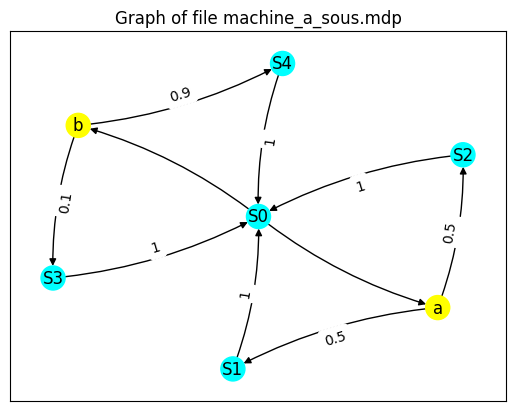

In [9]:
%run main.py draw {file_mas}

Simulation d'un MDP avec 5 pas

In [10]:
%run main.py simulate {file_mas} -n 5 -s ask_user -v 2

Start simulation from S0 with 5 steps...
Step 0
	State : S0
	Action : a
Step 1
	State : S2
	Action : None
Step 2
	State : S0
	Action : b
Step 3
	State : S4
	Action : None
Step 4
	State : S0
	Action : b
Final State: S3


Model-Checking d'une MC (dé)

In [19]:
%run main.py check_mc {file_dice} -T S4 -n 10

Compute for 10 steps
P(A0 |= <> S4) = 0.166015625


In [12]:
%run main.py check_mc_rewards {file_dice} -n 0 -g 0.9

Compute for infinite steps
G(A0) = 24.00
G(A1) = 15.24
G(A2) = 38.09
G(A3) = 11.36
G(A4) = 22.50
G(A5) = 40.50
G(A6) = 44.14
G(S1) = 10.00
G(S2) = 20.00
G(S3) = 30.00
G(S4) = 40.00
G(S5) = 50.00
G(S6) = 60.00


Model-Checking pour un MDP

In [13]:
%run main.py check_mdp {file_ex2} -T T

A solution was found with maximal probabilities for each starting state:
[1.  0.5 0.5 0.  1.  0.  1.  0.  1. ]


Statistical Model Checking quantitatif pour une MC (dé)

In [14]:
%run main.py SMC {file_dice} -T S6 -n 10 -e 0.01 -d 0.05

N = 9223
P(A0 |= <>(<=10) S6) ≈ 0.16697386967364197


Statistical Model Checking qualitatif pour une MC (dé)

In [21]:
%run main.py SMC_quali {file_dice} -T S6 --theta 0.14 -n 10 --alpha 0.01 --beta 0.01 -e 0.01 -d 0.05

P(M |= <>(≤ 10) S6) ≥ 0.14 (with β=1.00% for confidence)


In [25]:
%run main.py SMC_quali {file_dice} -T S6 --theta 0.175 -n 10 --alpha 0.01 --beta 0.01 -e 0.01 -d 0.05

P(M |= <>(≤ 10) S6) ≤ 0.175 (with ⍺=1.00% for confidence)


Reinforcement Learning : Value Iterations (machine à sous)

In [17]:
%run main.py RL_VI {file_mas} -g 0.5 -e 0.01

Begin optimization...
Computed in 14 steps.
Compute strategy...
Vn =  ['35.12', '117.56', '22.56', '517.56', '20.56']
Strat =  {'S0': 'b', 'S1': None, 'S2': None, 'S3': None, 'S4': None}


Reinforcement Learning : Q-learning (machine à sous)

In [18]:
%run main.py RL_QL {file_mas} -g 0.5 -i 100_000

Q = 
 [[  0.          34.52399436  33.98449583]
 [117.17717757   0.           0.        ]
 [ 22.17248504   0.           0.        ]
 [517.16960867   0.           0.        ]
 [ 20.17082678   0.           0.        ]]
Strat =  {'S0': 'a', 'S1': None, 'S2': None, 'S3': None, 'S4': None}
